<a href="https://colab.research.google.com/github/aditee1424/DM_HW1/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      pclass  survived  ... body                        home.dest
0          1         1  ...    ?                     St Louis, MO
1          1         1  ...    ?  Montreal, PQ / Chesterville, ON
2          1         0  ...    ?  Montreal, PQ / Chesterville, ON
3          1         0  ...  135  Montreal, PQ / Chesterville, ON
4          1         0  ...    ?  Montreal, PQ / Chesterville, ON
...      ...       ...  ...  ...                              ...
1304       3         0  ...  328                                ?
1305       3         0  ...    ?                                ?
1306       3         0  ...  304                                ?
1307       3         0  ...    ?                                ?
1308       3         0  ...    ?                                ?

[1309 rows x 14 columns]
--------------------------------------------------------------
(1309, 14)
--------------------------------------------------------------
['pclass' 'survived' 'name' 'sex' 'age' 'sibs

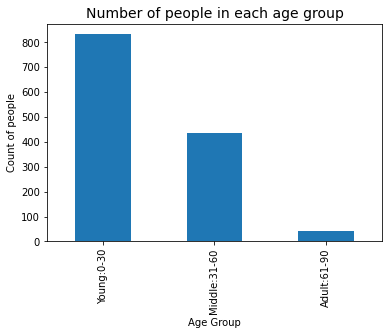

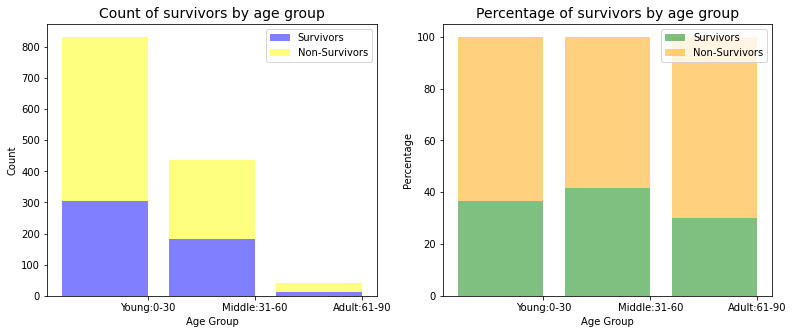

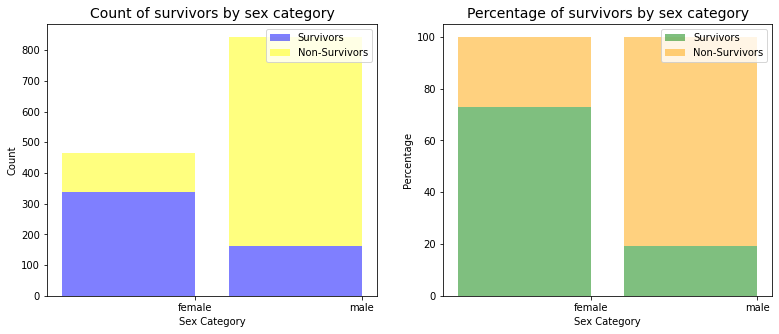

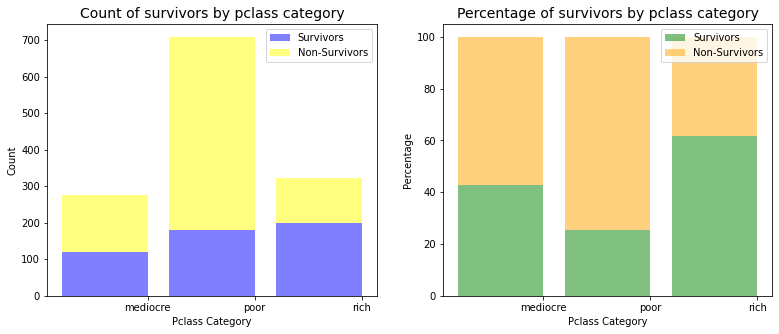

In [15]:
#Name: Aditee Dnyaneshwar Dakhane
#Student Id: 1001745502
#Sites Referred for this code: http://ghunt03.github.io/DAProjects/DAP02/TitanicDatasetInvestigation.html
#https://aaaanchakure.medium.com/implementation-of-data-preprocessing-on-titanic-dataset-6c553bef0bc6
#https://github.com/samipshah1397/Data-Mining/blob/main/Assignment/Titanic.py

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import files

def calculate_in_percentage(given_value, out_of_total, format_percent = False):
    percent = np.divide(given_value, out_of_total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent

#Reading csv file from github repository
url = 'https://raw.githubusercontent.com/aditee1424/DM_HW1/main/Titanic.csv'
dataset = pd.read_csv(url)
print(dataset)
print("--------------------------------------------------------------")
print(dataset.shape)
print("--------------------------------------------------------------")
print(dataset.columns.values)
print("--------------------------------------------------------------")

#Checking is NaN is present in any column
print("Number of NaN in each column of Dataset is:" , dataset.isnull().sum(), sep='\n')
print("--------------------------------------------------------------")

# dropping columns Cabin, Name and Ticket
dataset = dataset.drop(['cabin','name','ticket'], axis=1)
dataset.info()
print("--------------------------------------------------------------")

#mapping values True and False to 0 and 1 respectively in survivor column
survived_map_values = {0: False, 1: True}
dataset['survived'] = dataset['survived'].map(survived_map_values)
print("Mapping values to survivor column:")
print(dataset['survived'])
print("--------------------------------------------------------------")

#mapping values Rich,Mediocre,Poor to 1,2,3 respectively in pclass column
pclass_map_values = {1: 'Rich', 2: 'Mediocre', 3: 'Poor'}
dataset['pclass'] = dataset['pclass'].map(pclass_map_values)
print("Mapping values to pclass column:")
print(dataset['pclass'])
print("--------------------------------------------------------------")

#filling S in the place of NaN in embarked column
dataset['embarked'] = dataset['embarked'].replace('?', np.nan)
print("Number of NaN in each column of Dataset is:" , dataset.isnull().sum(), sep='\n')
dataset['embarked'].fillna('S',inplace=True)

#mapping values Southampton,Cherbourg,Queenstown to S,C,Q respectively in embarked column
embarked_map_values = {'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'}
dataset['embarked'] = dataset['embarked'].map(embarked_map_values)
print("Mapping values to embarked column:")
print(dataset['embarked'])

#replace '?' in the age column with NaN and then replace NaN with 0
dataset ['age'] = pd.to_numeric(dataset['age'], errors='coerce')
dataset['age'] = dataset['age'].replace(np.nan, 0)
#print(dataset['age'])
print("--------------------------------------------------------------")
print("Number of NaN in each column of Dataset is:" , dataset.isnull().sum(), sep='\n')

#Converting the continuous data of age column into categorical
age_groups = ['Young:0-30', 'Middle:31-60', 'Adult:61-90']
dataset['age'] = pd.cut(dataset.age, range(0, 91, 30), right=False, labels=age_groups)

#demonstration of each age group count
dataset.groupby(['age']).size().plot(kind='bar',stacked=True)
plt.title("Number of people in each age group",fontsize=14)
plt.ylabel('Count of people')
plt.xlabel('Age Group')

#Getting mean of survivors in each age group
print("--------------------------------------------------------------")
print("Mean of Survivors in each age group:")
survivors_age = dataset.groupby('age')['survived'].mean()
print(survivors_age)
print("--------------------------------------------------------------")

# calculate values for each survival status
survivors = dataset[dataset.survived==True]
non_survivors = dataset[dataset.survived==False]
survivors_age_group = survivors.groupby(['age']).size().values
non_survivors_age_group = non_survivors.groupby(['age']).size().values
print('Age Groups:','Young:0-30', 'Middle:31-60', 'Adult:61-90')
print('Count:',survivors_age_group)
print('Age Groups:','Young:0-30', 'Middle:31-60', 'Adult:61-90')
print('Count:',non_survivors_age_group)
print("--------------------------------------------------------------")

# calculate total count of survivors and non survivors
count = survivors_age_group + non_survivors_age_group

#To calcuate percentage of total count use calculate_in_percentage function defined above
survivors_percentages = calculate_in_percentage(survivors_age_group, count)*100 
non_survivors_percentages = calculate_in_percentage(non_survivors_age_group, count)*100 
tick_spacing= np.array(range(len(age_groups)))+0.4

# Plotting bar chart for the count of survivors and non survivors in each age group
f, (axis1, axis2) = plt.subplots(1, 2, figsize=(13,5))
axis1.bar(range(len(survivors_age_group)), survivors_age_group, label='Survivors', alpha=0.5, color='blue')
axis1.bar(range(len(non_survivors_age_group)), non_survivors_age_group, bottom=survivors_age_group, label='Non-Survivors', alpha=0.5, color='yellow')
plt.sca(axis1)
plt.xticks(tick_spacing, age_groups )
axis1.set_ylabel("Count")
axis1.set_xlabel("Age Group")
axis1.set_title("Count of survivors by age group",fontsize=14)
plt.legend(loc='upper right')

# Plotting bar chart for the percentage of survivors and non survivors in each age group
axis2.bar(range(len(survivors_percentages)), survivors_percentages, label='Survivors', alpha=0.5, color='green')
axis2.bar(range(len(non_survivors_percentages)), non_survivors_percentages, bottom=survivors_percentages,label='Non-Survivors', alpha=0.5, color='orange')
plt.sca(axis2)
plt.xticks(tick_spacing,  age_groups)
axis2.set_ylabel("Percentage")
axis2.set_xlabel("Age Group")
axis2.set_title("Percentage of survivors by age group",fontsize=14)
plt.legend(loc='upper right')

#Getting mean of survivors in each sex
print("--------------------------------------------------------------")
print("Mean of Survivors in each sex:")
survivors_sex = dataset.groupby('sex')['survived'].mean()
print(survivors_sex)
print("--------------------------------------------------------------")

# calculate values for each survival status in sex group
survivors_sex_group = survivors.groupby(['sex']).size().values
non_survivors_sex_group = non_survivors.groupby(['sex']).size().values
print('Sex Groups:','Female', 'Male')
print('Count:',survivors_sex_group)
print('Sex Groups:','Female', 'Male')
print('Count:',non_survivors_sex_group)
print("--------------------------------------------------------------")

# calculate total count of survivors and non survivors for sex column
count_sex = survivors_sex_group + non_survivors_sex_group
sex_category=['female','male']

#To calcuate percentage of total count use calculate_in_percentage function defined above
survivors_percentages_sex = calculate_in_percentage(survivors_sex_group, count_sex)*100 
non_survivors_percentages_sex = calculate_in_percentage(non_survivors_sex_group, count_sex)*100 
tick_spacing= np.array(range(len(sex_category)))+0.4

# Plotting bar chart for the count of survivors and non survivors in each sex category
f, (axis1, axis2) = plt.subplots(1, 2, figsize=(13,5))
axis1.bar(range(len(survivors_sex_group)), survivors_sex_group, label='Survivors', alpha=0.5, color='blue')
axis1.bar(range(len(non_survivors_sex_group)), non_survivors_sex_group, bottom=survivors_sex_group, label='Non-Survivors', alpha=0.5, color='yellow')
plt.sca(axis1)
plt.xticks(tick_spacing, sex_category )
axis1.set_ylabel("Count")
axis1.set_xlabel("Sex Category")
axis1.set_title("Count of survivors by sex category",fontsize=14)
plt.legend(loc='upper right')

# Plotting bar chart for the percentage of survivors and non survivors in each sex category
axis2.bar(range(len(survivors_percentages_sex)), survivors_percentages_sex, label='Survivors', alpha=0.5, color='green')
axis2.bar(range(len(non_survivors_percentages_sex)), non_survivors_percentages_sex, bottom=survivors_percentages_sex,label='Non-Survivors', alpha=0.5, color='orange')
plt.sca(axis2)
plt.xticks(tick_spacing,  sex_category)
axis2.set_ylabel("Percentage")
axis2.set_xlabel("Sex Category")
axis2.set_title("Percentage of survivors by sex category",fontsize=14)
plt.legend(loc='upper right')

#Getting mean of survivors in each pclass
print("--------------------------------------------------------------")
print("Mean of Survivors in each pclass:")
survivors_pclass = dataset.groupby('pclass')['survived'].mean()
print(survivors_pclass)
print("--------------------------------------------------------------")

# calculate values for each survival status in pclass group
survivors_pclass_group = survivors.groupby(['pclass']).size().values
non_survivors_pclass_group = non_survivors.groupby(['pclass']).size().values
print('Pclass Groups:','Mediocre', 'Poor', 'Rich')
print('Count:',survivors_pclass_group)
print('Pclass Groups:','Mediocre', 'Poor', 'Rich')
print('Count:',non_survivors_pclass_group)
print("--------------------------------------------------------------")

# calculate total count of survivors and non survivors for pclass column
count_pclass = survivors_pclass_group + non_survivors_pclass_group
pclass_category=['mediocre','poor','rich']

#To calcuate percentage of total count use calculate_in_percentage function defined above
survivors_percentages_pclass = calculate_in_percentage(survivors_pclass_group, count_pclass)*100 
non_survivors_percentages_pclass = calculate_in_percentage(non_survivors_pclass_group, count_pclass)*100 
tick_spacing= np.array(range(len(pclass_category)))+0.4

# Plotting bar chart for the count of survivors and non survivors in each pclass category
f, (axis1, axis2) = plt.subplots(1, 2, figsize=(13,5))
axis1.bar(range(len(survivors_pclass_group)), survivors_pclass_group, label='Survivors', alpha=0.5, color='blue')
axis1.bar(range(len(non_survivors_pclass_group)), non_survivors_pclass_group, bottom=survivors_pclass_group, label='Non-Survivors', alpha=0.5, color='yellow')
plt.sca(axis1)
plt.xticks(tick_spacing, pclass_category )
axis1.set_ylabel("Count")
axis1.set_xlabel("Pclass Category")
axis1.set_title("Count of survivors by pclass category",fontsize=14)
plt.legend(loc='upper right')

# Plotting bar chart for the percentage of survivors and non survivors in each sex category
axis2.bar(range(len(survivors_percentages_pclass)), survivors_percentages_pclass, label='Survivors', alpha=0.5, color='green')
axis2.bar(range(len(non_survivors_percentages_pclass)), non_survivors_percentages_pclass, bottom=survivors_percentages_pclass,label='Non-Survivors', alpha=0.5, color='orange')
plt.sca(axis2)
plt.xticks(tick_spacing,  pclass_category)
axis2.set_ylabel("Percentage")
axis2.set_xlabel("Pclass Category")
axis2.set_title("Percentage of survivors by pclass category",fontsize=14)
plt.legend(loc='upper right')


